In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing 
from sklearn.preprocessing import StandardScaler # for scaling
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # for evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [401]:
housing=fetch_california_housing()
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [402]:
df['MHV'] = housing.target # target column
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [403]:
df.rename(columns={'MedInc':'Median income'}, inplace=True)

In [404]:
df.head()

,Median income,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Median income  20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MHV            20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [406]:
df.describe()

,Median income,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [407]:
df.isnull().sum()

Median income    0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MHV              0
dtype: int64

In [408]:
scaler=StandardScaler()

In [409]:
x= df.drop('MHV', axis=1)
y=df['MHV']
scaled=scaler.fit_transform(x)
scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [ ]:
# first i displayed target columns.then i renamed the medinc to median income.i typed df.info() to check if there are null values.
# There are no null values in this dataset.i typed df.describe to display the statistics.then using df.isnull().sum() it displayed in number of-
# null values in each column.then i did feature to bring all features to a similar range so that one columns doesn't dominate the other 

In [410]:
x.head()

,Median income,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [411]:
y.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MHV, dtype: float64

In [412]:
x.shape

(20640, 8)

In [413]:
y.shape

(20640,)

In [414]:
# linear regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_prediction=lr_model.predict(x_test)



In [415]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [416]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

In [417]:
# Support Vector Regressor (SVR)
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)


In [418]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [419]:
#Model Evaluation and Comparison 
# function to evaluate model
def evaluate_model(y_actual,y_pred, model_name):    
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    print(f"{model_name} performance:")
    print('MAE:', mae)
    print('MSE',mse)
    print('MAE:', r2)
    print("\n")
    return [model_name, mae, mse, r2]

results=[]

In [482]:
results.append(evaluate_model(y_test,lr_prediction,'linear regression'))

linear regression performance:
MAE: 0.5332001304956564
MSE 0.5558915986952441
MAE: 0.575787706032451




In [480]:
results.append(evaluate_model(y_test,y_pred_rf,'random forest regressor'))

random forest regressor performance:
MAE: 0.32754256845930246
MSE 0.2553684927247781
MAE: 0.8051230593157366




In [478]:
results.append(evaluate_model(y_test,y_pred_gb,'gradient boosting regressor'))

gradient boosting regressor performance:
MAE: 0.3716425690425596
MSE 0.2939973248643864
MAE: 0.7756446042829697




In [476]:
results.append(evaluate_model(y_test,y_pred_svr,'support vector regressor(SVR)'))

support vector regressor(SVR) performance:
MAE: 0.8599506583445763
MSE 1.3320115421348744
MAE: -0.01648536010717372




In [474]:
results.append(evaluate_model(y_test,y_pred_dt,' decision tree regressor'))

 decision tree regressor performance:
MAE: 0.45467918846899225
MSE 0.495235205629094
MAE: 0.622075845135081




In [472]:
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE','R2'])
results_df = results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)
print(results_df)


                           Model       MAE       MSE        R2
0        random forest regressor  0.327543  0.255368  0.805123
1    gradient boosting regressor  0.371643  0.293997  0.775645
2        decision tree regressor  0.454679  0.495235  0.622076
3              linear regression  0.533200  0.555892  0.575788
4  support vector regressor(SVR)  0.859951  1.332012 -0.016485


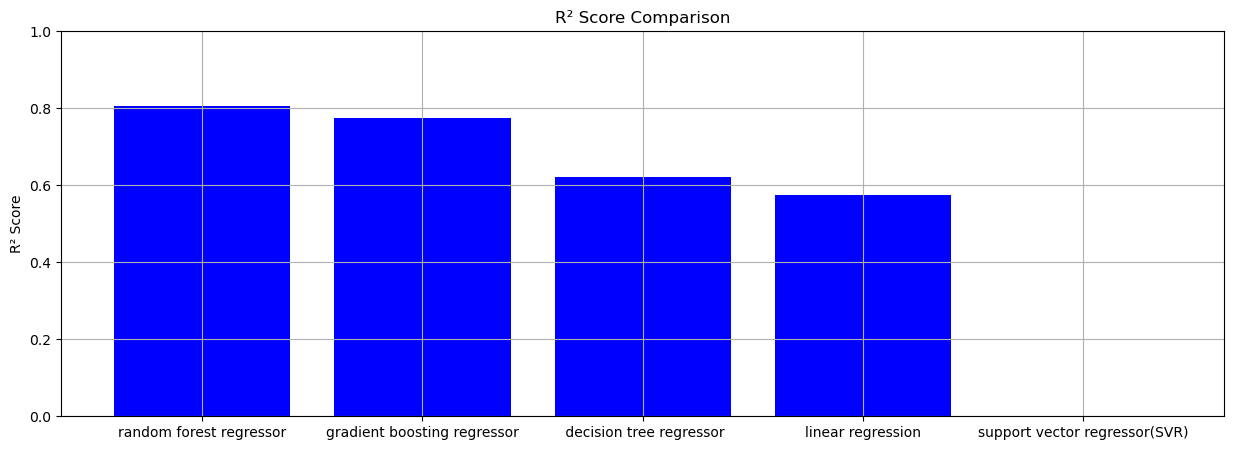

In [470]:
#visualization
plt.figure(figsize=(15,5))
plt.bar(results_df['Model'], results_df['R2'], color='blue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [488]:
#Comparing the results
best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

print(f"\n Best Model: {best_model['Model']} with R²={best_model['R2']:.4f}")
print(f" Worst Model: {worst_model['Model']} with R²={worst_model['R2']:.4f}")


 Best Model: random forest regressor with R²=0.8051
 Worst Model: support vector regressor(SVR) with R²=-0.0165
